# Описание датасета study

## Посмотрим на переменные, которые содержит датасет:

**1 school** — аббревиатура школы, в которой учится ученик

**2 sex** — пол ученика ('F' - женский, 'M' - мужской)

**3 age** — возраст ученика (от 15 до 22)

**4 address** — тип адреса ученика ('U' - городской, 'R' - за городом)

**5 famsize** — размер семьи ('LE3' <= 3, 'GT3' >3)

**6 Pstatus** — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

**7 Medu** — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

**8 Fedu** — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

**9 Mjob** — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

**10 Fjob** — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

**11 reason** — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

**12 guardian** — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

**13 traveltime** — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

**14 studytime** — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

**15 failures** — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

**16 schoolsup** — дополнительная образовательная поддержка (yes или no)

**17 famsup** — семейная образовательная поддержка (yes или no)

**18 paid** — дополнительные платные занятия по математике (yes или no)

**19 activities** — дополнительные внеучебные занятия (yes или no)

**20 nursery** — посещал детский сад (yes или no)

**21 higher** — хочет получить высшее образование (yes или no)

**22 internet** — наличие интернета дома (yes или no)

**23 romantic** — в романтических отношениях (yes или no)

**24 famrel** — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

**25 freetime** — свободное время после школы (от 1 - очень мало до 5 - очень мого)

**26 goout** — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

**27 health** — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

**28 absences** — количество пропущенных занятий

**29 score** — баллы по госэкзамену по математике

Импортируем основные библиотеки и взглянем на датасет:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

study = pd.read_csv('stud_math.csv')
display(study)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [2]:
display(study.head(10))
study.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Как мы видим, в датасете имеются NaN значения, которые в дальнейшем надо будет заполнить либо модой, либо медианой (в завимости от типа переменной).

Построим boxplot, чтобы провести первичную оценку налия в датасете выбросов.

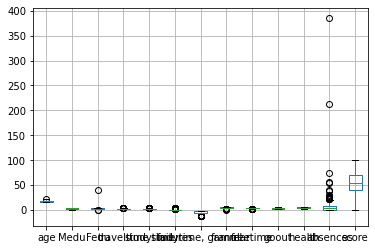

In [3]:
boxplot = study.boxplot()  # явно видны выбросы в Fedu, studytime (granular), absence

Оценим количество уникальных значений для номинативных переменных:

In [4]:
# количество уникальных значений и их распределение для school
print('Количество уникальных значений - ', study.school.nunique())
display(pd.DataFrame(study.school.value_counts()))
NaN = 395 - study.school.count()  # количество пустых значений
print('Количество пустых значений - ', NaN)

Количество уникальных значений -  2


,school
GP,349
MS,46


Количество пустых значений -  0


In [5]:
# количество уникальных значений и их распределение для sex
print('Количество уникальных значений - ', study.sex.nunique())
display(pd.DataFrame(study.sex.value_counts()))
NaN = 395 - study.sex.count()  # количество пустых значений
print('Количество пустых значений - ', NaN)

Количество уникальных значений -  2


,sex
F,208
M,187


Количество пустых значений -  0


In [6]:
# количество уникальных значений и их распределение для address
print('Количество уникальных значений - ', study.address.nunique())
display(pd.DataFrame(study.address.value_counts()))
NaN = 395 - study.address.count()  # количество пустых значений
print('Количество пустых значений - ', NaN)

Количество уникальных значений -  2


,address
U,295
R,83


Количество пустых значений -  17


In [7]:
# количество уникальных значений и их распределение для famsize
print('Количество уникальных значений - ', study.famsize.nunique())
display(pd.DataFrame(study.famsize.value_counts()))
NaN = 395 - study.famsize.count()  # количество пустых значений
print('Количество пустых значений - ', NaN)

Количество уникальных значений -  2


,famsize
GT3,261
LE3,107


Количество пустых значений -  27


In [8]:
# количество уникальных значений и их распределение для Pstatus
print('Количество уникальных значений - ', study.Pstatus.nunique())
display(pd.DataFrame(study.Pstatus.value_counts()))
NaN = 395 - study.Pstatus.count()  # количество пустых значений
print('Количество пустых значений - ', NaN)

Количество уникальных значений -  2


,Pstatus
T,314
A,36


Количество пустых значений -  45


In [9]:
# количество уникальных значений и их распределение для Medu
print('Количество уникальных значений - ', study.Medu.nunique())
display(pd.DataFrame(study.Medu.value_counts()))
NaN = 395 - study.Medu.count()  # количество пустых значений
print('Количество пустых значений - ', NaN)

Количество уникальных значений -  5


,Medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


Количество пустых значений -  3


In [10]:
# количество уникальных значений и их распределение для Medu
print('Количество уникальных значений - ', study.Fedu.nunique())
display(pd.DataFrame(study.Fedu.value_counts()))
NaN = 395 - study.Fedu.count()  # количество пустых значений
print('Количество пустых значений - ', NaN)

Количество уникальных значений -  6


,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


Количество пустых значений -  24


Промежуточный вывод:
- переменные school и sex не содержат пустых значений
- количество уникальных значений переменных совпадает с заявленным, за исключением переменной Fedu - в последующем надо будет исключить лишние значения
- наиболее некачественные данные, содержащие наибольшее количество пустых значений содержат переменные Pstatus (45 пустых значений), famsize (27 пустых значений) и Fedu (24 пустых значения)

Для замены пустых значений напишем следующую функцию:

In [11]:
def null_replace(x):
    for i in study.columns:
        if study[i].dtype == float:
            # замена пустых ячеек на медиану для типа переменной float
            study[i] = study[i].fillna(study[i].median())

        elif study[i].dtype == object:
            # замена пустых ячеек на моду для типа переменной object
            study[i] = study[i].fillna(study[i].mode()[0])
    return x


# создаем датафрейм student с заполненными ячейками
student = study.apply(null_replace)

Далее последовательно проверяем значения переменных на наличие выбросов. Также находим моду для каждой номинативной переменной, строим графики, показывающие частоту встречаемости значений данных переменных

<AxesSubplot:>

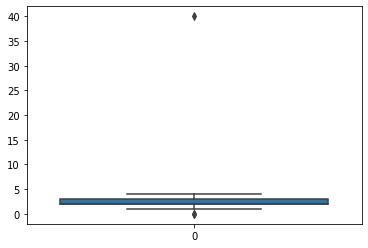

In [12]:
sns.boxplot(data=student.Fedu)  # надо устранить выбросы для переменной Fedu

In [13]:
# устраняем выбросы, поскольку переменная может содержать значения от 1 до 4-х
student.Fedu = student.Fedu[(student.Fedu >= 1) & (student.Fedu <= 4)]

In [14]:
student.Fedu.mode()  # мода - наиболее частое значение Fedu (образование отца)

0    2.0
dtype: float64

<AxesSubplot:xlabel='Fedu', ylabel='count'>

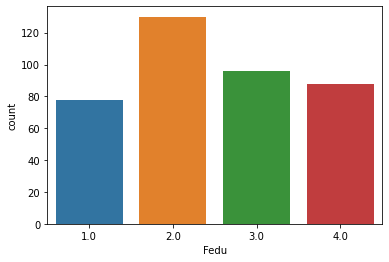

In [15]:
sns.countplot(x='Fedu', data=student)

<AxesSubplot:>

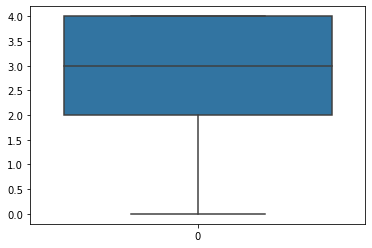

In [16]:
sns.boxplot(data=student.Medu)

In [17]:
student.Medu.mode()  # мода - наиболее частое значение Medu (образование матери)

0    4.0
dtype: float64

<AxesSubplot:xlabel='Medu', ylabel='count'>

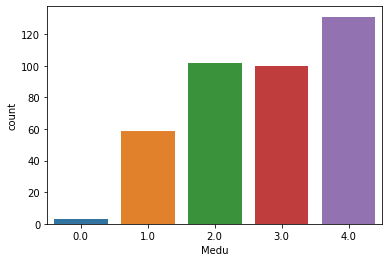

In [18]:
sns.countplot(x='Medu', data=student)

<AxesSubplot:>

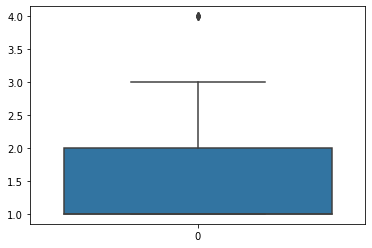

In [19]:
sns.boxplot(data=student.traveltime)

In [20]:
# мода - наиболее частое значение traveltime (время в пути до школы)
student.traveltime.mode()

0    1.0
dtype: float64

<AxesSubplot:xlabel='traveltime', ylabel='count'>

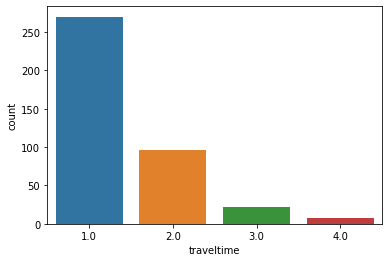

In [21]:
sns.countplot(x='traveltime', data=student)

<AxesSubplot:>

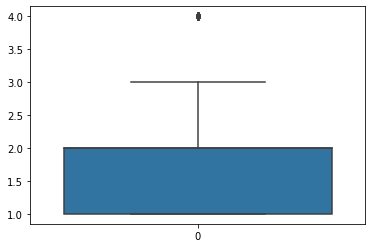

In [22]:
sns.boxplot(data=student.studytime)

In [23]:
# мода - наиболее частое значение studytime (время на учёбу помимо школы в неделю)
student.studytime.mode()

0    2.0
dtype: float64

<AxesSubplot:xlabel='studytime', ylabel='count'>

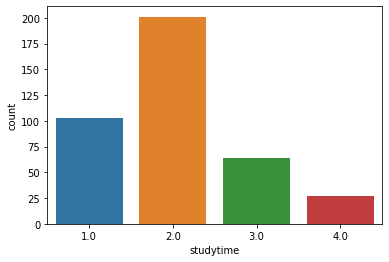

In [24]:
sns.countplot(x='studytime', data=student)

<AxesSubplot:>

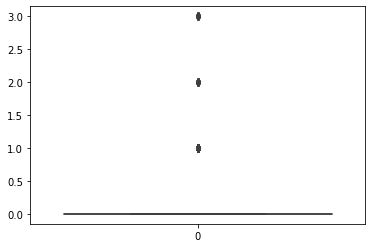

In [25]:
sns.boxplot(data=student.failures)

In [26]:
# мода - наиболее частое значение failures (количество внеучебных неудач)
student.failures.mode()

0    0.0
dtype: float64

<AxesSubplot:xlabel='failures', ylabel='count'>

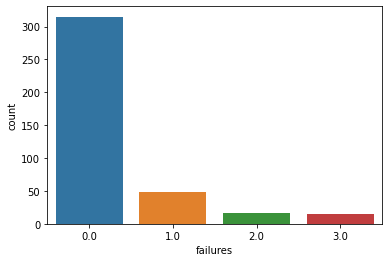

In [27]:
sns.countplot(x='failures', data=student)

<AxesSubplot:>

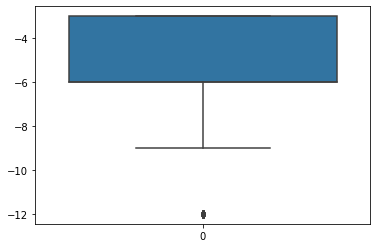

In [28]:
# описание столбца не дано, значение непонятно, в последующем подлежит удалению
sns.boxplot(data=student["studytime, granular"])

<AxesSubplot:>

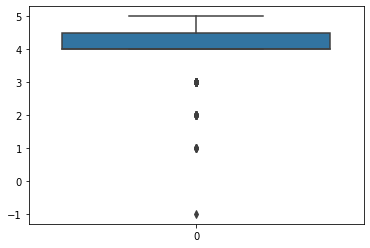

In [29]:
# переменная содержит выброс (отрицательное значение)
sns.boxplot(data=student.famrel)

In [30]:
# устраняем отрицательные значения
student.famrel = student.famrel[student.famrel > 0]

In [31]:
student.famrel.mode()  # наиболее частое значение famrel (семейные отношения)

0    4.0
dtype: float64

<AxesSubplot:xlabel='famrel', ylabel='count'>

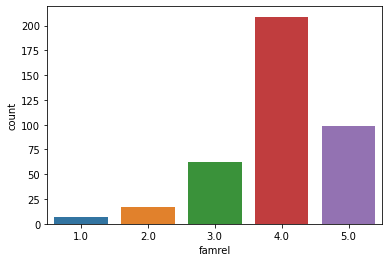

In [32]:
sns.countplot(x='famrel', data=student)

<AxesSubplot:>

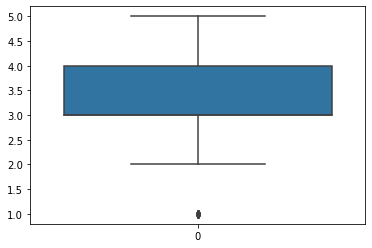

In [33]:
sns.boxplot(data=student.freetime)

In [34]:
# мода - наиболее частое значение freetime (свободное время после школы)
student.freetime.mode()

0    3.0
dtype: float64

<AxesSubplot:xlabel='freetime', ylabel='count'>

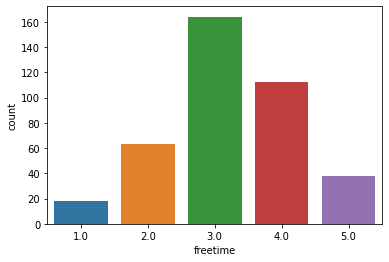

In [35]:
sns.countplot(x='freetime', data=student)

<AxesSubplot:>

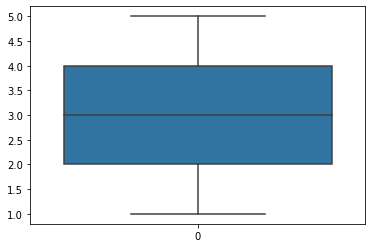

In [36]:
sns.boxplot(data=student.goout)

In [37]:
# мода - наиболее частое значение goout (проведение времени с друзьями)
student.goout.mode()

0    3.0
dtype: float64

<AxesSubplot:xlabel='goout', ylabel='count'>

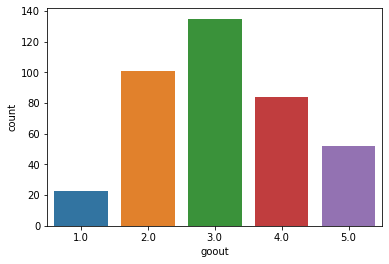

In [38]:
sns.countplot(x='goout', data=student)

<AxesSubplot:>

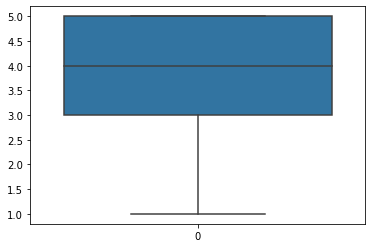

In [39]:
sns.boxplot(data=student.health)

<AxesSubplot:xlabel='health', ylabel='count'>

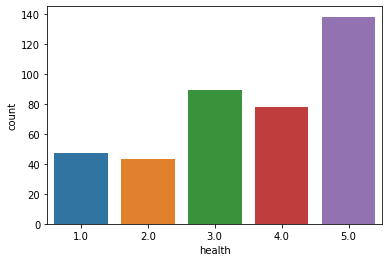

In [40]:
sns.countplot(x='health', data=student)

In [41]:
# мода - наиболее частое значение health (текущее состояние здоровья)
student.health.mode()

0    5.0
dtype: float64

Промежуточные выводы:
- чаще всего образование отца ученика - 5-9 классов, образование матери - высшее
- время в пути до школы в большинстве случаев меньше 15 минут
- время на учёбу помимо школы в неделю - 2-5 часов
- в большинстве случаев количество внеучебных неудач не находится в промежутке от 1 до 3-х (включительно)
- семейные отношения чаще оценены в 4 балла из 5
- свободное время после школы чаще всего оценено как среднее, как и проведение времени с друзьями
- текущее состояние учеников в большинстве случаев очень хорошее

Далее проведем анализ числовых переменных:

<AxesSubplot:>

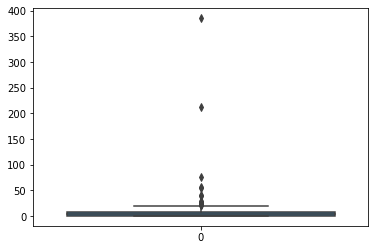

In [42]:
# имеются выбросы, которые следует устранить
sns.boxplot(data=student.absences)

In [43]:
# находим 75 и 25 процентили, затем интерквартильный размах
q3 = student.absences.quantile(q=0.75, interpolation='midpoint')
q1 = student.absences.quantile(q=0.25, interpolation='midpoint')
IQR = q3 - q1
a = q1 - 1.5*IQR
b = q3 + 1.5*IQR

# устраняем выбросы
student.absences = student.absences[(
    student.absences > a) & (student.absences < b)]

In [44]:
# наиболее частое значение absences (количество пропущенных занятий)
display('Медиана = ' + str(student.absences.median()))
# среднее значение absences (количество пропущенных занятий)
display('Среднее значение = ' + str(student.absences.mean()))
# стандартное отклонение - мера типичного отклонения от среднего absences (количество пропущенных занятий)
display('Ст.отклонение = ' + str(student.absences.std()))
display('Дисперсия = ' + str(student.absences.var()))  # дисперсия
display('Минимум = ' + str(student.absences.min()))
display('Максимум = ' + str(student.absences.max()))

'Медиана = 4.0'

'Среднее значение = 4.419786096256685'

'Ст.отклонение = 4.643625046601569'

'Дисперсия = 21.563253573425424'

'Минимум = 0.0'

'Максимум = 19.0'

<AxesSubplot:>

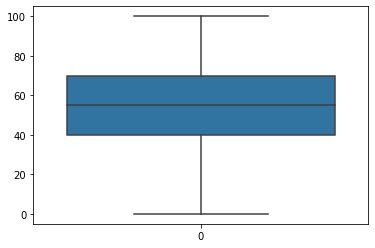

In [45]:
sns.boxplot(data=student.score)

In [46]:
# наиболее частое значение score (баллы по госэкзамену по математике)
display('Медиана = ' + str(student.score.median()))
# среднее значение score (баллы по госэкзамену по математике)
display('Среднее значение = ' + str(student.score.mean()))
# стандартное отклонение - мера типичного отклонения от среднего score (баллы по госэкзамену по математике)
display('Ст.отклонение = ' + str(student.score.std()))
display('Дисперсия = ' + str(student.score.var()))  # дисперсия
display('Минимум = ' + str(student.score.min()))
display('Максимум = ' + str(student.score.max()))

'Медиана = 55.0'

'Среднее значение = 52.30379746835443'

'Ст.отклонение = 22.74631360236087'

'Дисперсия = 517.3947824969472'

'Минимум = 0.0'

'Максимум = 100.0'

Промежуточные выводы:
- наиболее часто у учеников 4 пропущенных занятия, в среднем число пропущенных занятий - 4,4. Количество пропущенных занятий отклоняется от среднего на 4,6 занятия. Минимум пропущенных занятий - 0, максимум - 19 занятий.
- наиболее частое значение баллов за экзамен - 55, среднее значение несколько меньше - 52,3. Количество баллов за экзамен отклоняется от среднего на 22,7 балла, что говорит о большом разбросе баллов за экзамен. Минимум набранных баллов - 0. Можно предположить, что 0 баллов выставлялось ученику, не пришедшему на экзамен либо удаленного с экзамена (к примеру, за списывание). Максимум набранных баллов - 100.

Далее проведем корреляционный анализ данных. Из него видно, что достаточной степенью корреляции связаны только 2 переменные - образование отца и матери. Однако, следует оставить под наблюдение еще несколько переменных, таких как возраст, время на учёбу помимо школы в неделю, количество внеучебных неудач и проведение времени с друзьями.
Удаляем переменную studytime, granular, которая, как писалось выше, не имеет ясного значения.
Также удаляем некоррелирующие переменные: traveltime, famrel, freetime, health, absences.

In [47]:
student.corr()  # оставляем age, Medu, Fedu, studytime, failures, goout

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.161375,-0.164714,0.084755,-0.015355,0.228081,0.015355,0.061483,0.026443,0.134069,-0.063892,0.127576,-0.151150
Medu,-0.161375,1.000000,0.606228,-0.160877,0.077050,-0.245110,-0.077050,-0.020065,0.026210,0.063361,-0.050991,0.093019,0.205568
Fedu,-0.164714,0.606228,1.000000,-0.121768,0.017801,-0.269021,-0.017801,-0.039910,-0.022474,0.036868,-0.008696,-0.010323,0.130516
traveltime,0.084755,-0.160877,-0.121768,1.000000,-0.094637,0.049670,0.094637,-0.024574,-0.012496,0.051775,-0.044842,-0.070257,-0.055243
studytime,-0.015355,0.077050,0.017801,-0.094637,1.000000,-0.166598,-1.000000,0.027403,-0.119014,-0.051090,-0.073674,-0.068601,0.114371
failures,0.228081,-0.245110,-0.269021,0.049670,-0.166598,1.000000,0.166598,0.002722,0.094826,0.113649,0.075849,0.078303,-0.326532
"studytime, granular",0.015355,-0.077050,-0.017801,0.094637,-1.000000,0.166598,1.000000,-0.027403,0.119014,0.051090,0.073674,0.068601,-0.114371
famrel,0.061483,-0.020065,-0.039910,-0.024574,0.027403,0.002722,-0.027403,1.000000,0.157192,0.066687,0.096582,-0.062711,0.049605
freetime,0.026443,0.026210,-0.022474,-0.012496,-0.119014,0.094826,0.119014,0.157192,1.000000,0.292305,0.060557,0.083074,0.018200
goout,0.134069,0.063361,0.036868,0.051775,-0.051090,0.113649,0.051090,0.066687,0.292305,1.000000,-0.014274,0.124671,-0.125708


In [48]:
# удаляем лишние переменные
student = student.drop(student.columns[[12, 24, 20, 25, 27, 28]], axis=1)

Проанализируем номинативные переменные с построением графиков и определением переменных, которые впоследствии требуется удалить

<AxesSubplot:xlabel='school', ylabel='score'>

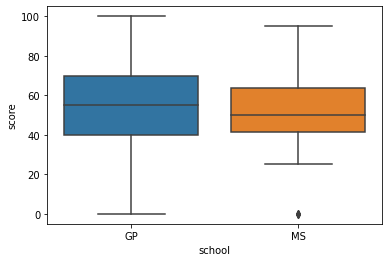

In [49]:
sns.boxplot(x='school', y='score', data=student)

<AxesSubplot:xlabel='sex', ylabel='score'>

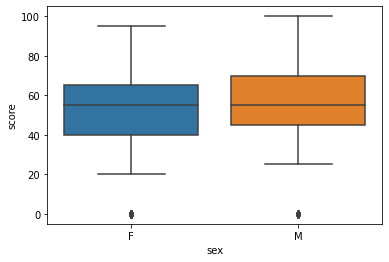

In [50]:
sns.boxplot(x='sex', y='score', data=student)

<AxesSubplot:xlabel='address', ylabel='score'>

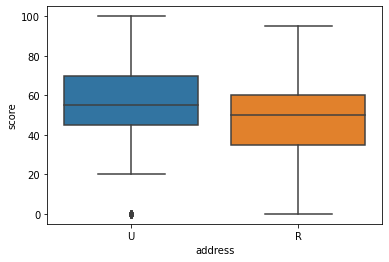

In [51]:
sns.boxplot(x='address', y='score', data=student)

<AxesSubplot:xlabel='famsize', ylabel='score'>

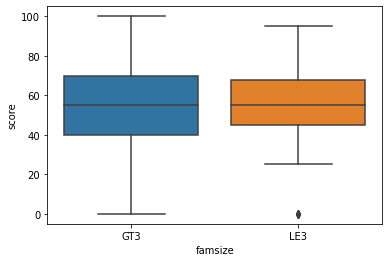

In [52]:
# удаляем из-за невыраженной разницы
sns.boxplot(x='famsize', y='score', data=student)

<AxesSubplot:xlabel='Pstatus', ylabel='score'>

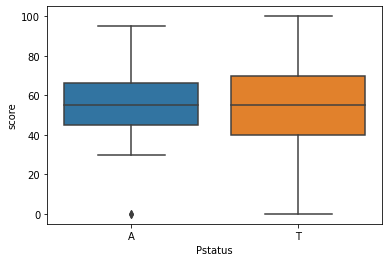

In [53]:
# удаляем из-за невыраженной разницы
sns.boxplot(x='Pstatus', y='score', data=student)

<AxesSubplot:xlabel='Fjob', ylabel='score'>

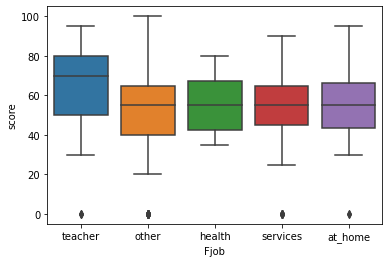

In [54]:
sns.boxplot(x='Fjob', y='score', data=student)

<AxesSubplot:xlabel='Mjob', ylabel='score'>

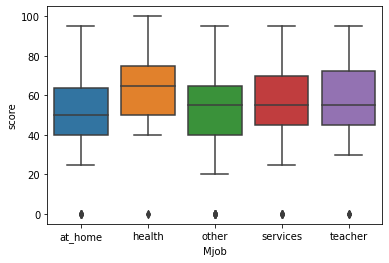

In [55]:
sns.boxplot(x='Mjob', y='score', data=student)

<AxesSubplot:xlabel='reason', ylabel='score'>

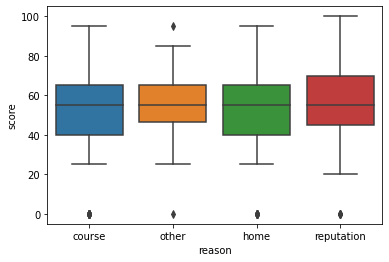

In [56]:
# удаляем из-за невыраженной разницы
sns.boxplot(x='reason', y='score', data=student)

<AxesSubplot:xlabel='guardian', ylabel='score'>

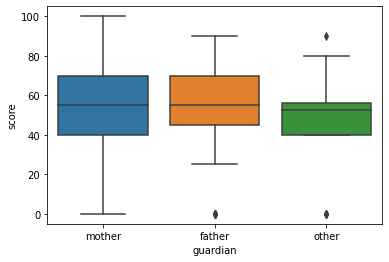

In [57]:
# удаляем из-за невыраженной разницы
sns.boxplot(x='guardian', y='score', data=student)

<AxesSubplot:xlabel='schoolsup', ylabel='score'>

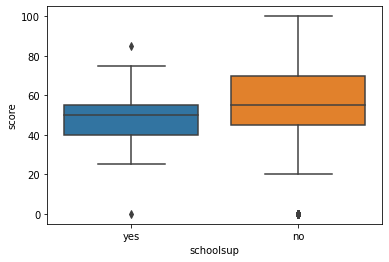

In [58]:
sns.boxplot(x='schoolsup', y='score', data=student)

<AxesSubplot:xlabel='famsup', ylabel='score'>

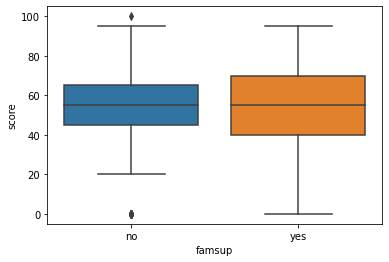

In [59]:
# нет существенного влияния, удаляем
sns.boxplot(x='famsup', y='score', data=student)

<AxesSubplot:xlabel='paid', ylabel='score'>

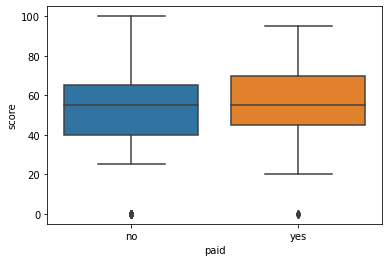

In [60]:
# нет существенного влияния, удаляем
sns.boxplot(x='paid', y='score', data=student)

<AxesSubplot:xlabel='activities', ylabel='score'>

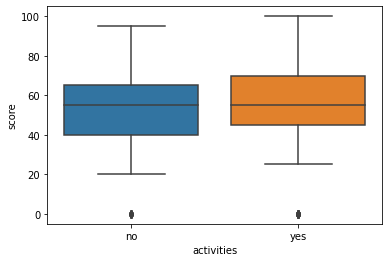

In [61]:
# нет существенного влияния, удаляем
sns.boxplot(x='activities', y='score', data=student)

<AxesSubplot:xlabel='nursery', ylabel='score'>

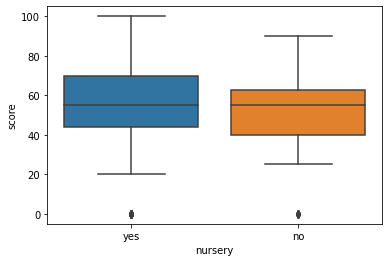

In [62]:
# нет существенного влияния, удаляем
sns.boxplot(x='nursery', y='score', data=student)

<AxesSubplot:xlabel='higher', ylabel='score'>

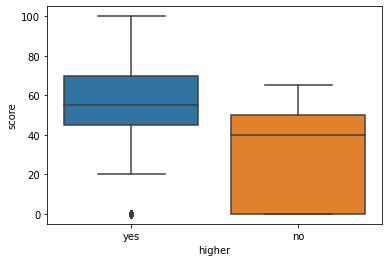

In [63]:
sns.boxplot(x='higher', y='score', data=student)

<AxesSubplot:xlabel='internet', ylabel='score'>

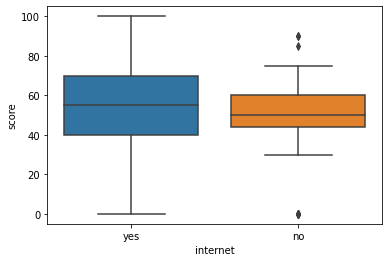

In [64]:
sns.boxplot(x='internet', y='score', data=student)

<AxesSubplot:xlabel='romantic', ylabel='score'>

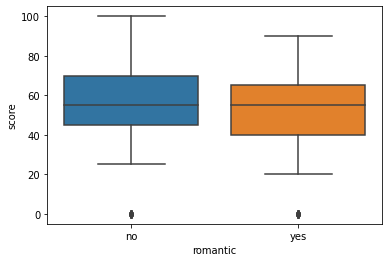

In [65]:
sns.boxplot(x='romantic', y='score', data=student)

Удаляем переменные с невыраженной разницей между значениями:
- famsize (размер семьи)
- Pstatus (статус совместного жилья родителей)
- reason (причина выбора школы)
- guardian (опекун)
- famsup (семейная образовательная поддержка)
- paid (дополнительные платные занятия по математике)
- activities (дополнительные внеучебные занятия)
- nursery (посещал детский сад)
- romantic (в романтических отношениях)

In [66]:
student = student.drop(student.columns[[4, 5, 10, 11, 15, 16, 17, 18]], axis=1)

Получаем итоговый вариант датасета:

In [67]:
display(student)

,school,sex,age,address,Medu,Fedu,Mjob,Fjob,studytime,failures,schoolsup,higher,internet,romantic,goout,score
0,GP,F,18,U,4.0,4.0,at_home,teacher,2.0,0.0,yes,yes,yes,no,4.0,30.0
1,GP,F,17,U,1.0,1.0,at_home,other,2.0,0.0,no,yes,yes,no,3.0,30.0
2,GP,F,15,U,1.0,1.0,at_home,other,2.0,3.0,yes,yes,yes,no,2.0,50.0
3,GP,F,15,U,4.0,2.0,health,other,3.0,0.0,no,yes,yes,yes,2.0,75.0
4,GP,F,16,U,3.0,3.0,other,other,2.0,0.0,no,yes,no,no,2.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,2.0,2.0,services,services,2.0,2.0,no,yes,no,no,4.0,45.0
391,MS,M,17,U,3.0,1.0,services,services,1.0,0.0,no,yes,yes,no,5.0,80.0
392,MS,M,21,R,1.0,1.0,other,other,1.0,3.0,no,yes,no,no,3.0,35.0
393,MS,M,18,R,3.0,2.0,services,other,1.0,0.0,no,yes,yes,no,1.0,50.0


Итоговый вывод:
1) датасет имеет достаточно хорошее качество данных: так, переменная с наибольшим количеством отсутствующих значений (Pstatus, 45 значений) - отсутствующие значения составляют 11,4%. Имеется одна переменная с неясным значением, которую требуется удалить (studytime, granular).

2) в дальнейшем, при построении модели, можно использовать следующие переменные, влияющие на score:
- school (аббревиатура школы, в которой учится ученик)
- sex (пол ученика)
- age (возраст ученика)
- address (тип адреса ученика)
- Medu (образование матери)
- Fedu (образование отца)
- Mjob (работа матери)
- Fjob (работа отца)
- studytime (время на учёбу помимо школы в неделю)
- failures (количество внеучебных неудач)
- schoolsup (дополнительная образовательная поддержка)
- higher (хочет получить высшее образование)
- internet (наличие интернета дома)
- romantic (в романтических отношениях)
- goout (проведение времени с друзьями)

3) Исходя из анализа данных, можно составить приблизительный "портрет" наиболее "успешного" и "неуспешного" ученика.
- 1-й случай: ученик немного младше своих сверстников, мальчик из города, учащийся в GP школе. Его отец работает учителем, а мать - в сфере здравоохранения. Ученик не нуждается в дополнительной образовательной поддержке, однако самостоятельно занимается больше, чем его сверстники, используя интернет. Ученик хочет получить высшее образование, не состоит в романтических отношениях. Он не имеет внеучебных неудач и мало проводит времени с друзьями.
- 2-й случай: это девочка, живущая за городом, немного старше своих сверстников, учащаяся в MS школе. Ее мама не работает, отец - не известно. Она получает дополнительную образовательную поддержку, однако самостоятельно занимается мало без использования интернета. Ученица не хочет получить высшее образование, имеет романтические отношения. У нее много внеучебных неудач, и она много времени проводит с друзьями.

Примечание: данные "портреты" - крайний вариант сочетания всех факторов, возможно множество промежуточных вариантов.